In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# better plots
sns.set()

In [3]:
# config
CGM_DATA = "data/MonitorCGM.txt"
MEALS_DATA = "data/MonitorMeal.txt"
INSULIN_DATA = "data/MonitorTotalBolus.txt"

DATE_FORMAT = "%Y-%m-%d %H:%M:%S"

In [4]:
# convert datetime string into integer
def dt2int(dtstr):
    return int(datetime.strptime(dtstr, DATE_FORMAT).strftime("%s"))

# extract data for a single patient and phase
def get_case_data(df, deident_id, from_dt, to_dt, dtcol="LocalDtTm"):
    # extract data for one patient
    df_case = df.loc[df.DeidentID == deident_id]
    df_case[dtcol] = df_case[dtcol].map(dt2int)
    df_case = df_case.sort_values(by=[dtcol])
    df_case = df_case.reset_index()

    # extract data for one phase
    df_case = df_case.loc[(df_case[dtcol] >= from_dt) & (df_case[dtcol] < to_dt)]
    
    return df_case

In [86]:
# load data
cgm_df = pd.read_csv(CGM_DATA, delimiter="|")
meals_df = pd.read_csv(MEALS_DATA, delimiter="|")
insulin_df = pd.read_csv(INSULIN_DATA, delimiter="|")

In [29]:
# find dates on which data is recorded
dates = np.unique(np.fromiter(map(lambda d: d[:10], sorted(cgm_df.loc[cgm_df.DeidentID == 2].LocalDtTm)), dtype="object"))

# plt.figure(figsize=(35, 10))
# plt.plot(list(map(lambda d: dt2int(f"{d} 00:00:00"), dates)))
# plt.xticks(np.arange(dates.size), dates, rotation=90)

# plt.show()

In [7]:
# data selectors
deident_id = 2
from_dt = dt2int("2014-05-05 00:00:00")
to_dt = dt2int("2014-05-08 00:00:00")

In [8]:
# preprocess data
cgm_df_case = get_case_data(cgm_df, deident_id, from_dt, to_dt)
meals_df_case = get_case_data(meals_df, deident_id, from_dt, to_dt)
insulin_df_case = get_case_data(insulin_df, deident_id, from_dt, to_dt, dtcol="LocalDeliveredDtTm")

/tmp/ipykernel_22031/1737862660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case[dtcol] = df_case[dtcol].map(dt2int)
/tmp/ipykernel_22031/1737862660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case[dtcol] = df_case[dtcol].map(dt2int)
/tmp/ipykernel_22031/1737862660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

# Visualize Data

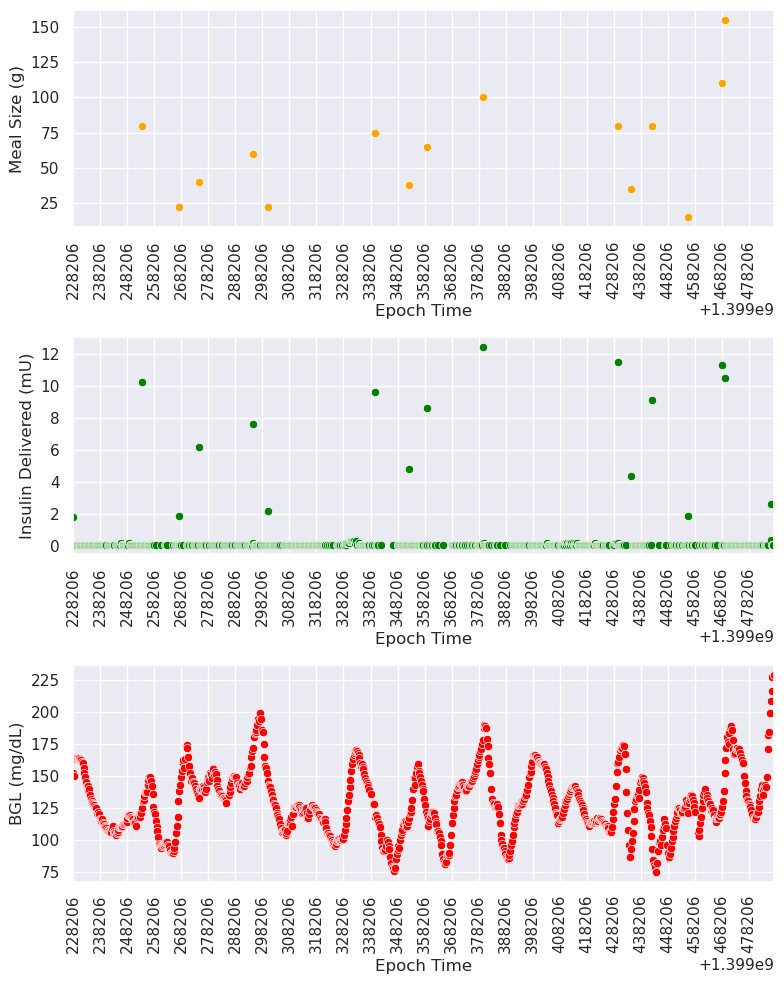

In [27]:
dt_min = min((meals_df_case.LocalDtTm.min(), insulin_df_case.LocalDeliveredDtTm.min(), cgm_df_case.LocalDtTm.min()))
dt_max = max((meals_df_case.LocalDtTm.max(), insulin_df_case.LocalDeliveredDtTm.max(), cgm_df_case.LocalDtTm.max()))

plt.figure(figsize=(8, 10))

plt.subplot(311)
sns.scatterplot(x="LocalDtTm", y="MealSize", data=meals_df_case, color="orange")
plt.xlabel("Epoch Time")
plt.ylabel("Meal Size (g)")
plt.xlim(dt_min, dt_max)
plt.xticks(np.arange(dt_min, dt_max, 10000), rotation=90)

plt.subplot(312)
sns.scatterplot(x="LocalDeliveredDtTm", y="DeliveredValue", data=insulin_df_case, color="green")
plt.xlabel("Epoch Time")
plt.ylabel("Insulin Delivered (mU)")
plt.xlim(dt_min, dt_max)
plt.xticks(np.arange(dt_min, dt_max, 10000), rotation=90)

plt.subplot(313)
sns.scatterplot(x="LocalDtTm", y="CGM", data=cgm_df_case, color="red")
plt.xlabel("Epoch Time")
plt.ylabel("BGL (mg/dL)")
plt.xlim(dt_min, dt_max)
plt.xticks(np.arange(dt_min, dt_max, 10000), rotation=90)

plt.tight_layout()
plt.show()

In [28]:
print("total timepoints:", (dt_max - dt_min) // (5 * 60))
print("meal samples:", meals_df_case["LocalDtTm"].size)
print("insulin samples:", insulin_df_case["LocalDeliveredDtTm"].size)
print("CGM samples:", cgm_df_case["LocalDtTm"].size)

total timepoints: 863
meal samples: 15
insulin samples: 659
CGM samples: 854


# Difference between CGM.txt and MonitorCGM.txt

In [11]:
CGM_DATA_UNKNOWN = "data/CGM.txt"

cgm_data = pd.read_csv(CGM_DATA_UNKNOWN, delimiter="|")
mcgm_data = pd.read_csv(CGM_DATA, delimiter="|")

cgm_case = get_case_data(cgm_data, deident_id, from_dt, to_dt, dtcol="DisplayTime")
mcgm_case = get_case_data(mcgm_data, deident_id, from_dt, to_dt)

/tmp/ipykernel_22031/1737862660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case[dtcol] = df_case[dtcol].map(dt2int)
/tmp/ipykernel_22031/1737862660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case[dtcol] = df_case[dtcol].map(dt2int)


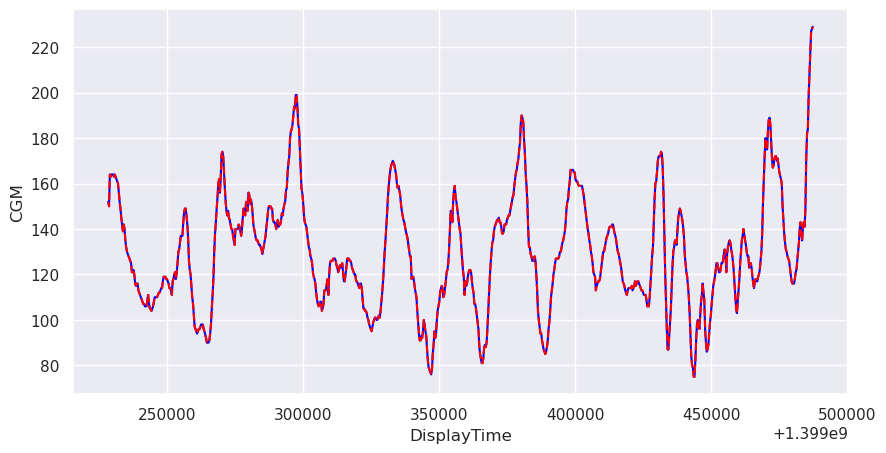

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="DisplayTime", y="CGM", data=cgm_case, color="blue")
sns.lineplot(x="LocalDtTm", y="CGM", data=mcgm_case, color="red", linestyle="--")
plt.show()